In [1]:
#Ayush Pandhi [1003227457] [University of Toronto]
#Chloe Cheng [1003254818] [University of Toronto]

#Importing required modules
import numpy as np
import matplotlib.pyplot as plt

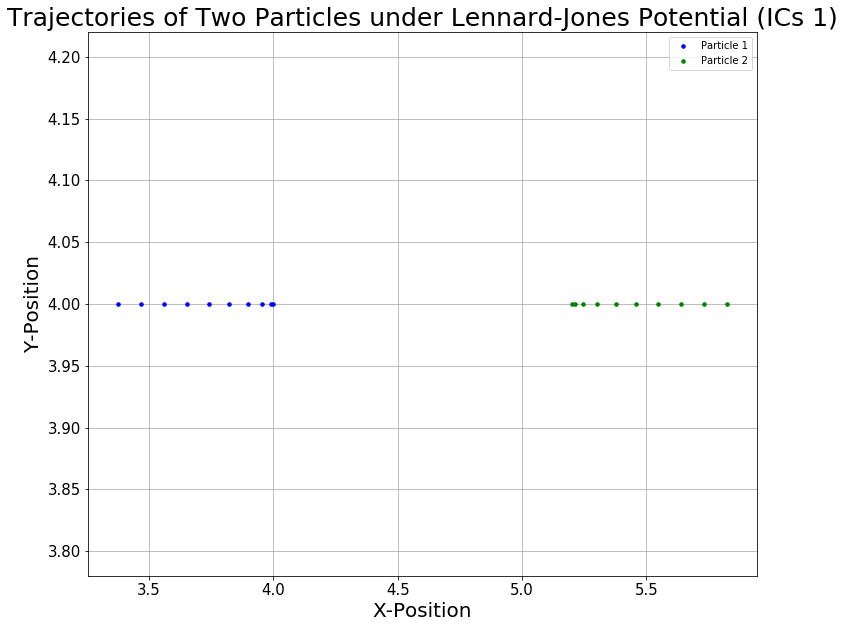

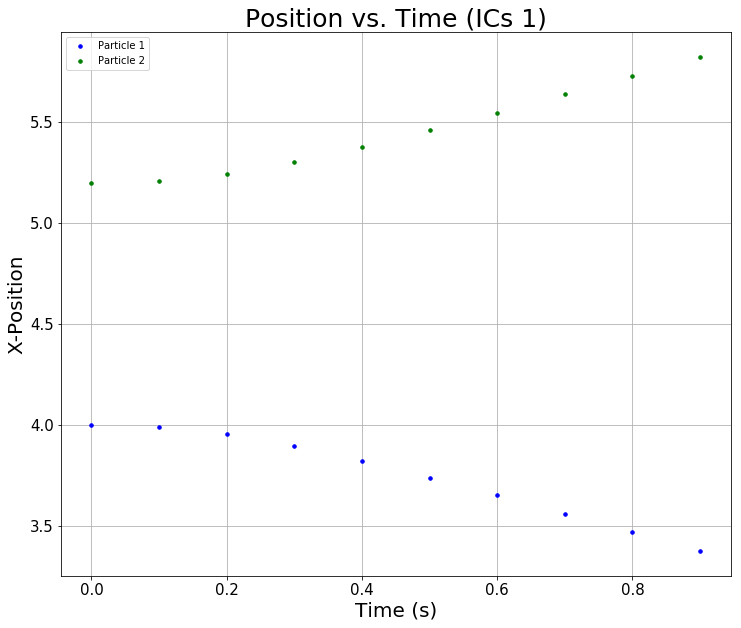

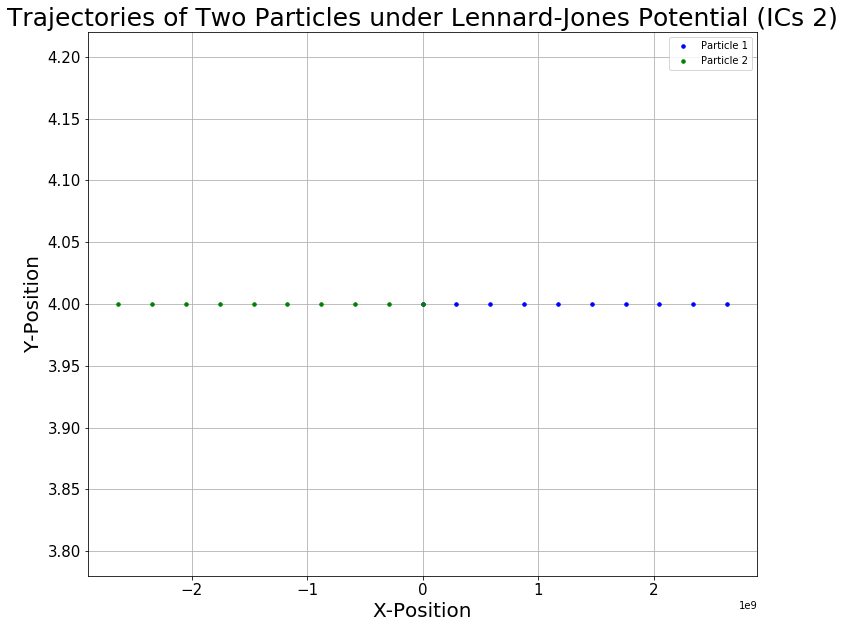

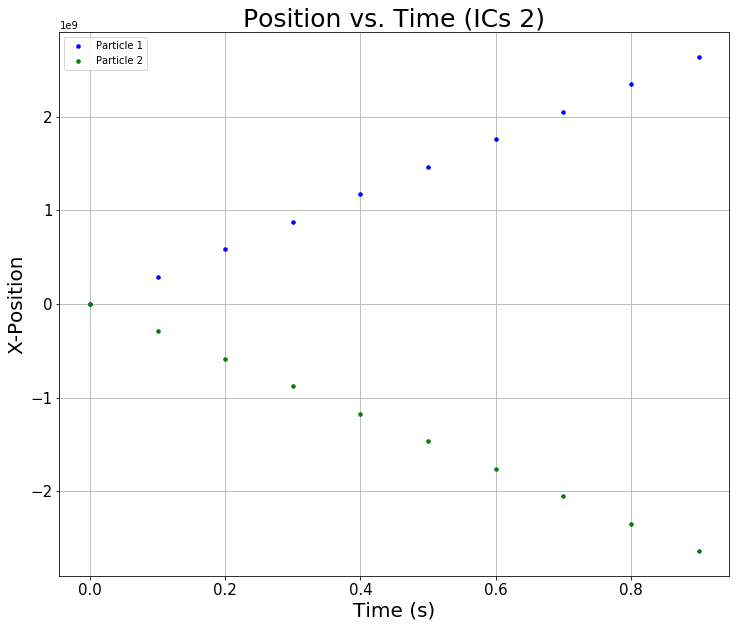

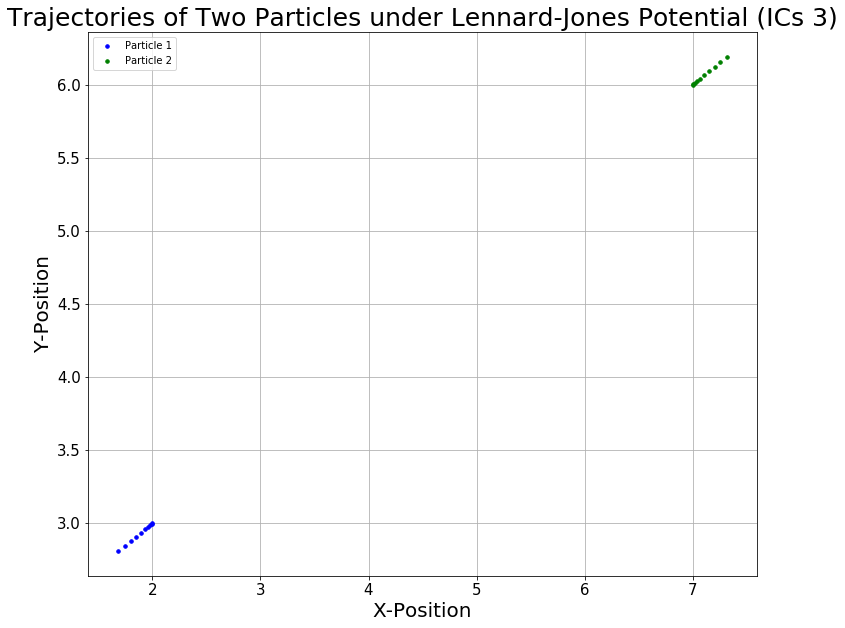

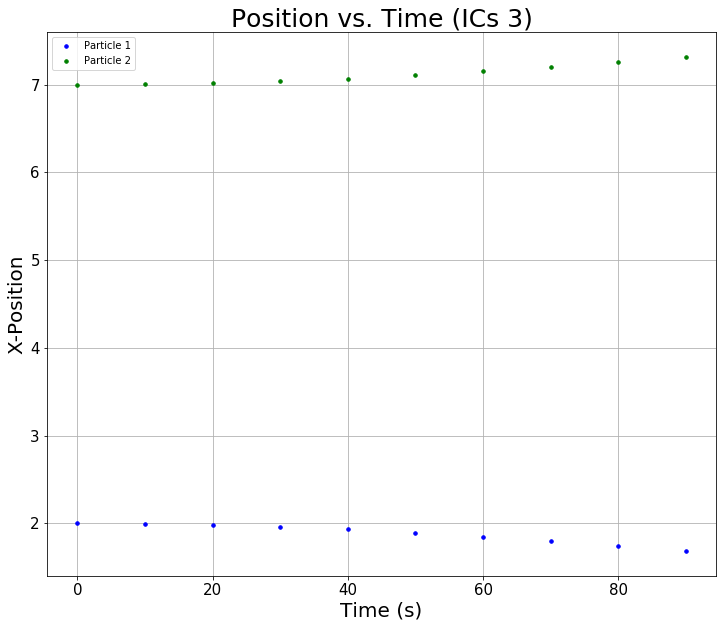

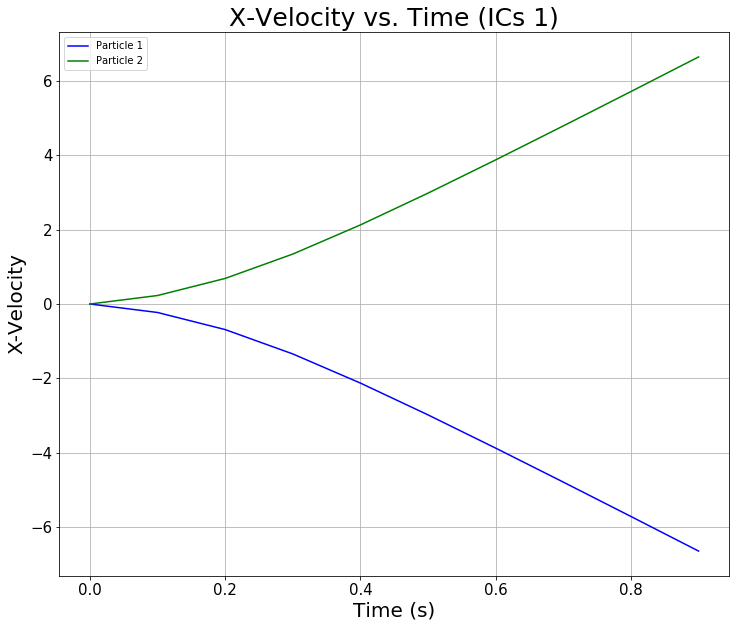

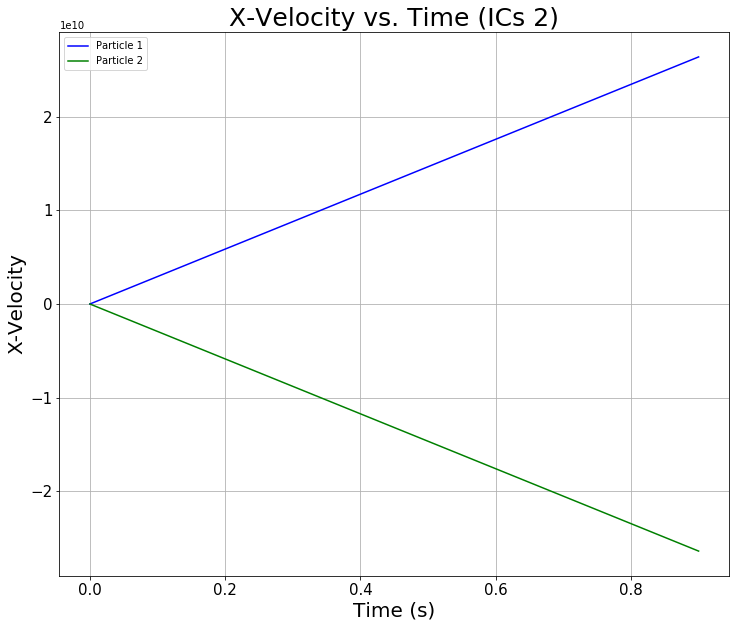

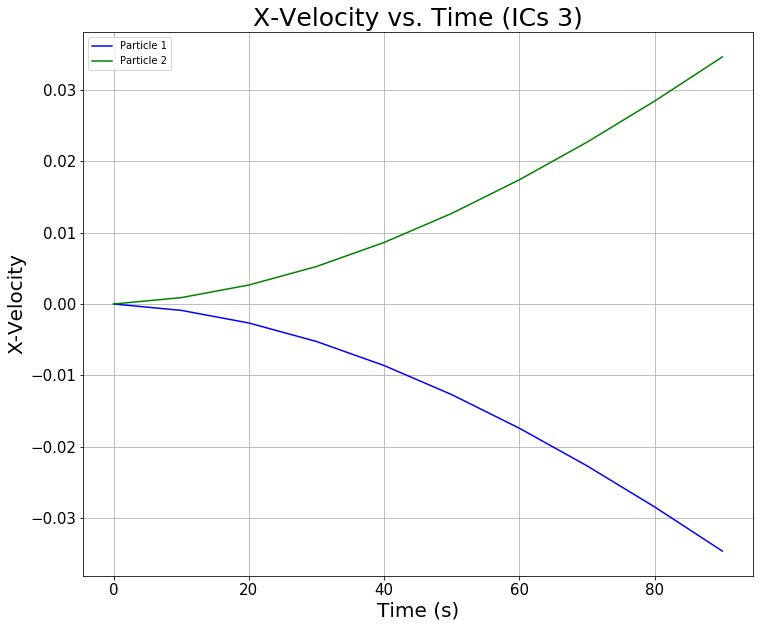

In [2]:
#PROBLEM 1

#PART B
#Defining a function for Verlet method
def Verlet(a, b, N, f, r):
    h = (b - a)/N
    tpoints = np.arange(a, b, h)
    xpoints = []
    vxpoints = []
    ypoints = []
    vypoints = []
    #Define velocity half-steps
    f_half = 0.5*h*f(r)
    vx_half = r[1] + f_half[1]
    vy_half = r[3] + f_half[3]
    
    for t in tpoints:
        xpoints.append(r[0].copy())
        vxpoints.append(r[1].copy())
        ypoints.append(r[2].copy())
        vypoints.append(r[3].copy())
        r[0] += h*vx_half
        r[2] += h*vy_half
        k = h*f(r)
        r[1] += vx_half + 0.5*k[1]
        r[3] += vy_half + 0.5*k[3]
        f_half = 0.5*h*f(r)
        vx_half += k[1]
        vy_half += k[3]
    return np.array(tpoints, float), np.array(xpoints, float), np.array(vxpoints, float), np.array(ypoints, float), np.array(vypoints, float)

#Defining a function for x and y components of acceleration under Lennard-Jones potential
def LJ_acc(r):
    x = r[0]
    dx = np.array((r[0][1] - r[0][0], r[0][0] - r[0][1]))
    vx = r[1]
    
    y = r[2]
    dy = np.array((r[2][1] - r[2][0], r[2][0] - r[2][1]))
    vy = r[3]
    
    fx = vx
    fy = vy
    fvx = ((24*dx)/((dx**2 + dy**2)**(8/2)))*((2/((dx**2 + dy**2)**(6/2))) - 1)
    fvy = ((24*dy)/((dx**2 + dy**2)**(8/2)))*((2/((dx**2 + dy**2)**(6/2))) - 1)
    return np.array([fx, fvx, fy, fvy], float)

#Defining initial conditions
t_init = 0
t_final1 = 1
N = 10
t_final2 = 100

#ICs 1
r1 = np.array([[4.0, 5.2],
              [0.0, 0.0],
              [4.0, 4.0],
              [0.0,0.0]])
r1_t, r1_x, r1_vx, r1_y, r1_vy = Verlet(t_init, t_final1, N, LJ_acc, r1)

#ICs 2
r2 = np.array([[4.9, 5.1],
              [0.0, 0.0],
              [4.0, 4.0],
              [0.0,0.0]])
r2_t, r2_x, r2_vx, r2_y, r2_vy = Verlet(t_init, t_final1, N, LJ_acc, r2)

#ICs 3
r3 = np.array([[2.0, 7.0],
              [0.0, 0.0],
              [3.0, 6.0],
              [0.0,0.0]])
r3_t, r3_x, r3_vx, r3_y, r3_vy = Verlet(t_init, t_final2, N, LJ_acc, r3)

#Plots for the first set of initial conditions
#Plotting trajectories on the same axes
plt.figure(figsize=(12,10))
plt.plot(r1_x[:,0], r1_y[:,0], color='b', marker='.', markersize=7, linestyle='None', label='Particle 1')
plt.plot(r1_x[:,1], r1_y[:,1], 'g', marker='.', linestyle="None", markersize=7, label='Particle 2')
plt.title('Trajectories of Two Particles under Lennard-Jones Potential (ICs 1)', fontsize=25)
plt.xlabel('X-Position', fontsize=20)
plt.ylabel('Y-Position', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('lab7_q1_plot1.pdf', bbox_inches='tight')
plt.show()

#Plotting x-position vs. time
plt.figure(figsize=(12,10))
plt.plot(r1_t, r1_x[:,0], color='b', marker='.', markersize=7, linestyle='None', label='Particle 1')
plt.plot(r1_t, r1_x[:,1], 'g', marker='.', linestyle="None", markersize=7, label='Particle 2')
plt.title('Position vs. Time (ICs 1)', fontsize=25)
plt.ylabel('X-Position', fontsize=20)
plt.xlabel('Time (s)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('lab7_q1_plot2.pdf', bbox_inches='tight')
plt.show()

#Plots for the second set of initial conditions
#Plotting trajectories on the same axes
plt.figure(figsize=(12,10))
plt.plot(r2_x[:,0], r2_y[:,0], color='b', marker='.', markersize=7, linestyle='None', label='Particle 1')
plt.plot(r2_x[:,1], r2_y[:,1], 'g', marker='.', linestyle="None", markersize=7, label='Particle 2')
plt.title('Trajectories of Two Particles under Lennard-Jones Potential (ICs 2)', fontsize=25)
plt.xlabel('X-Position', fontsize=20)
plt.ylabel('Y-Position', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('lab7_q1_plot3.pdf', bbox_inches='tight')
plt.show()

#Plotting x-position vs. time
plt.figure(figsize=(12,10))
plt.plot(r2_t, r2_x[:,0], color='b', marker='.', markersize=7, linestyle='None', label='Particle 1')
plt.plot(r2_t, r2_x[:,1], 'g', marker='.', linestyle="None", markersize=7, label='Particle 2')
plt.title('Position vs. Time (ICs 2)', fontsize=25)
plt.ylabel('X-Position', fontsize=20)
plt.xlabel('Time (s)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('lab7_q1_plot4.pdf', bbox_inches='tight')
plt.show()

#Plots for the third set of initial conditions
#Plotting trajectories on the same axes
plt.figure(figsize=(12,10))
plt.plot(r3_x[:,0], r3_y[:,0], color='b', marker='.', markersize=7, linestyle='None', label='Particle 1')
plt.plot(r3_x[:,1], r3_y[:,1], 'g', marker='.', linestyle="None", markersize=7, label='Particle 2')
plt.title('Trajectories of Two Particles under Lennard-Jones Potential (ICs 3)', fontsize=25)
plt.xlabel('X-Position', fontsize=20)
plt.ylabel('Y-Position', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('lab7_q1_plot5.pdf', bbox_inches='tight')
plt.show()

#Plotting x-position vs. time
plt.figure(figsize=(12,10))
plt.plot(r3_t, r3_x[:,0], color='b', marker='.', markersize=7, linestyle='None', label='Particle 1')
plt.plot(r3_t, r3_x[:,1], 'g', marker='.', linestyle="None", markersize=7, label='Particle 2')
plt.title('Position vs. Time (ICs 3)', fontsize=25)
plt.ylabel('X-Position', fontsize=20)
plt.xlabel('Time (s)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('lab7_q1_plot6.pdf', bbox_inches='tight')
plt.show()

#Plotting velocities for first set of initial conditions
plt.figure(figsize=(12,10))
plt.plot(r1_t, r1_vx[:,0], color='b', label='Particle 1')
plt.plot(r1_t, r1_vx[:,1], 'g', label='Particle 2')
plt.title('X-Velocity vs. Time (ICs 1)', fontsize=25)
plt.ylabel('X-Velocity', fontsize=20)
plt.xlabel('Time (s)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('lab7_q1_plot7.pdf', bbox_inches='tight')
plt.show()

#Plotting velocities for second set of initial conditions
plt.figure(figsize=(12,10))
plt.plot(r2_t, r2_vx[:,0], color='b', label='Particle 1')
plt.plot(r2_t, r2_vx[:,1], 'g', label='Particle 2')
plt.title('X-Velocity vs. Time (ICs 2)', fontsize=25)
plt.ylabel('X-Velocity', fontsize=20)
plt.xlabel('Time (s)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('lab7_q1_plot8.pdf', bbox_inches='tight')
plt.show()

#Plot velocities for third set of initial conditions
plt.figure(figsize=(12,10))
plt.plot(r3_t, r3_vx[:,0], color='b', label='Particle 1')
plt.plot(r3_t, r3_vx[:,1], 'g', label='Particle 2')
plt.title('X-Velocity vs. Time (ICs 3)', fontsize=25)
plt.ylabel('X-Velocity', fontsize=20)
plt.xlabel('Time (s)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('lab7_q1_plot9.pdf', bbox_inches='tight')
plt.show()

--------------------------------
PART A RESULTS:
E_0 =  138.02881165268067 eV
E_1 =  690.1440640909453 eV
E_2 =  1242.2593232862534 eV
--------------------------------

--------------------------------
PART B RESULTS:
E_0 =  205.3165034710976 eV
E_1 =  735.7256474286085 eV
E_2 =  1443.636921666496 eV
--------------------------------



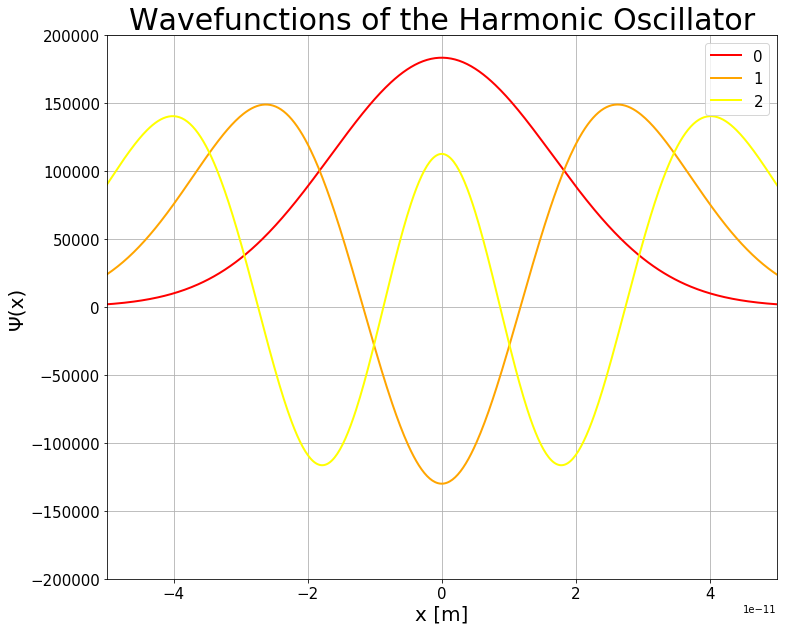

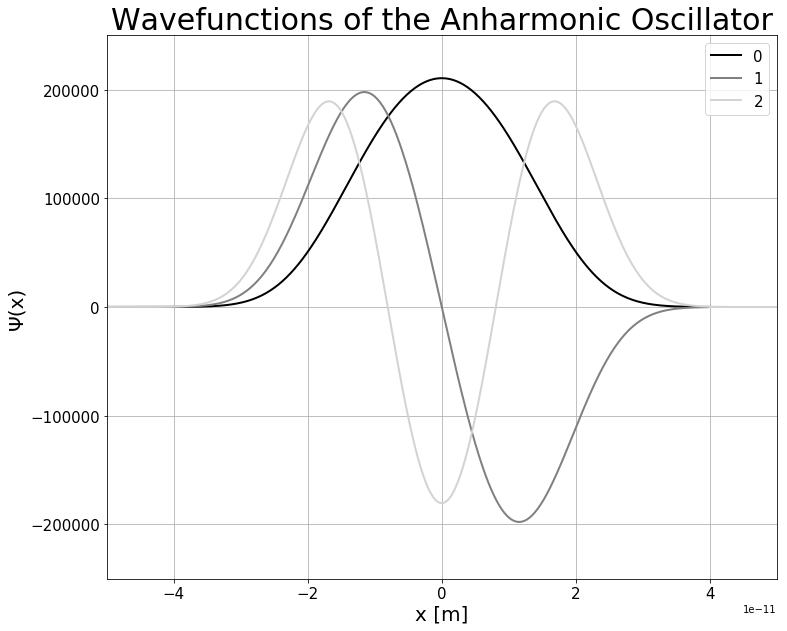

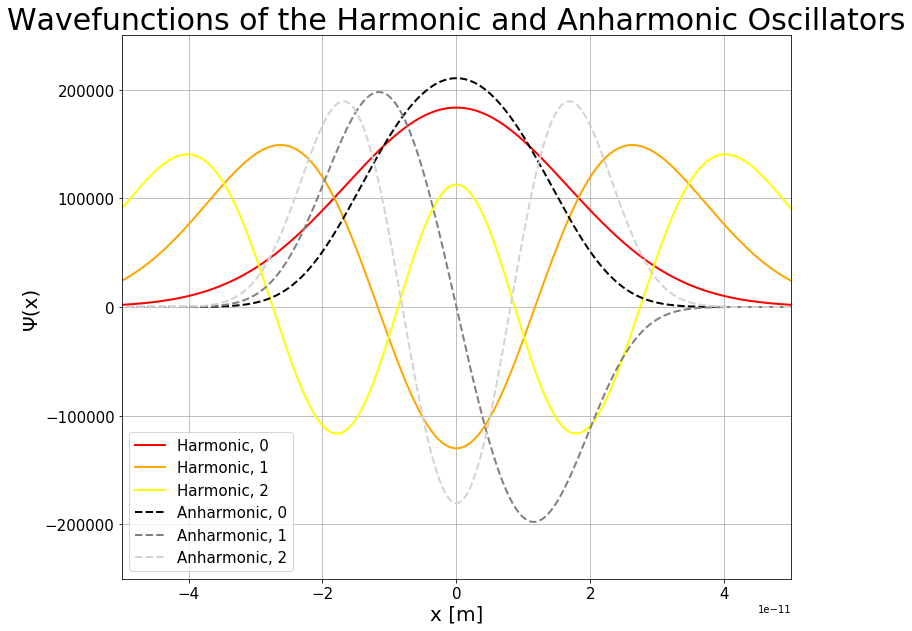

In [3]:
#PROBLEM 2

#PART A
#Defining constants
e = 1.602e-19      #[J]
V0 = 50*e          #[J]
a = 1e-11          #[m]
hbar = 1.05457e-34 #[J*s]
m = 9.10938e-31    #Mass of an electron [kg]

#Defining initial conditions
x1 = -10*a        #Minimum x [m]
x2 = 10*a         #Maximum x [m]
psi_0 = 0.0       #wf at boundaries
N = 1000          #Number of Steps
h = (x2 - x1)/N   #Step size

#Defining a function to use the RK4 method on our wavefunction based on code modified from Newman (2013)
def RK4_wf(E):
    def f(r, x):
        def V(x):
            return V0*x**2/a**2

        psi = r[0]
        phi = r[1]
        return np.array([phi, (2*m/hbar**2)*(V(x) - E)*psi], float)

    r = np.array([psi_0, 1.0] ,float)
    wf = []
    for x in np.arange(x1, x2, h):
        wf.append(r[0])
        k1 = h * f(r, x)
        k2 = h * f(r + 0.5 * k1, x + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, x + 0.5 * h)
        k4 = h * f(r + k3, x + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return np.array(wf, float)

#Defining a method to find the secant root based on code modified from Newman (2013)
def root(E1, E2):
    acc = e/1000
    wf = RK4_wf(E1)
    psi2 = wf[N - 1]
    
    while abs(E1 - E2) > acc:
        wf = RK4_wf(E2)
        psi1, psi2 = psi2, wf[N - 1]
        E1, E2 = E2, E2 - psi2*(E2 - E1)/(psi2 - psi1)

    #Normalize the wf with Simpson's rule
    wf_sqr = wf*wf
    norm = h/3*(wf_sqr[0] + wf_sqr[N//2 - 1] + 4*np.sum(wf_sqr[1:N//2:2]) + 2*np.sum(wf_sqr[0:N//2 + 1:2]))

    return E2/e, wf/np.sqrt(2*norm)

#Computing the three lowest energy states with the above functions
E0, psi0 = root(0, 0.5*e)
E1, psi1 = root(400*e, 600*e)
E2, psi2 = root(900*e, 1100*e)

#Printing the results of the three lowest energy states
print('--------------------------------')
print('PART A RESULTS:')
print('E_0 = ', E0, 'eV')
print('E_1 = ', E1, 'eV')
print('E_2 = ', E2, 'eV')
print('--------------------------------')
print()

#PART B
#Redefining the RK4 method with a new potential (anharmonic)
#Defining a function to use the RK4 method on our wavefunction based on code modified from Newman (2013)
def RK4_wf2(E):
    def f(r, x):
        def V(x):
            return V0*x**4/a**4

        psi = r[0]
        phi = r[1]
        return np.array([phi, (2*m/hbar**2)*(V(x) - E)*psi], float)

    r = np.array([psi_0, 1.0] ,float)
    wf = []
    for x in np.arange(x1, x2, h):
        wf.append(r[0])
        k1 = h * f(r, x)
        k2 = h * f(r + 0.5 * k1, x + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, x + 0.5 * h)
        k4 = h * f(r + k3, x + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return np.array(wf, float)

#Redefining the secant root function for the new potential based on code modified from Newman (2013)
def root_2(E1, E2):
    acc = e/1000
    wf = RK4_wf2(E1)
    psi2 = wf[N - 1]
    
    while abs(E1 - E2) > acc:
        wf = RK4_wf2(E2)
        psi1, psi2 = psi2, wf[N - 1]
        E1, E2 = E2, E2 - psi2*(E2 - E1)/(psi2 - psi1)

    #Normalize the wf with Simpson's rule
    wf_sqr = wf*wf
    norm = h/3*(wf_sqr[0] + wf_sqr[N//2 - 1] + 4*np.sum(wf_sqr[1:N//2:2]) + 2*np.sum(wf_sqr[0:N//2 + 1:2]))

    return E2/e, wf/np.sqrt(2*norm)

#Computing the three lowest energy states for the new potential
E0_2, psi0_2 = root_2(0, 0.5*e)
E1_2, psi1_2 = root_2(400*e, 600*e)
E2_2, psi2_2 = root_2(900*e, 1100*e)

#Printing the three lowest energy states for the new potential
print('--------------------------------')
print('PART B RESULTS:')
print('E_0 = ', E0_2, 'eV')
print('E_1 = ', E1_2, 'eV')
print('E_2 = ', E2_2, 'eV')
print('--------------------------------')
print()

#PART C
#Defining a range of x points with step size h
xrange = np.arange(x1, x2, h)

#Plotting the wavefunction for the Harmonic Oscillator
plt.figure(figsize=(12,10))
plt.plot(xrange, psi0, 'red', linewidth=2, label='0')
plt.plot(xrange, psi1, 'orange', linewidth=2, label='1')
plt.plot(xrange, psi2, 'yellow', linewidth=2, label='2')
plt.title('Wavefunctions of the Harmonic Oscillator', fontsize=30)
plt.xlabel('x [m]', fontsize=20)
plt.ylabel('Ψ(x)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-5*a, 5*a)
plt.ylim(-200000, 200000)
plt.grid()
plt.legend(fontsize=15)
#plt.savefig('lab7_q2_plot1.pdf', bbox_inches='tight')
plt.show()

#Plotting the wavefunction for the Anharmonic Oscillator
plt.figure(figsize=(12,10))
plt.plot(xrange, psi0_2, 'k', linewidth=2, label='0')
plt.plot(xrange, psi1_2, 'grey', linewidth=2, label='1')
plt.plot(xrange, psi2_2, 'lightgrey', linewidth=2, label='2')
plt.title('Wavefunctions of the Anharmonic Oscillator', fontsize=30)
plt.xlabel('x [m]', fontsize=20)
plt.ylabel('Ψ(x)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-5*a, 5*a)
plt.ylim(-250000, 250000)
plt.grid()
plt.legend(fontsize=15)
#plt.savefig('lab7_q2_plot2.pdf', bbox_inches='tight')
plt.show()

#Overplotting the wavefunction for the Harmonic and Anharmonic Oscillators
plt.figure(figsize=(12,10))
plt.plot(xrange, psi0, 'r', linewidth=2, label='Harmonic, 0')
plt.plot(xrange, psi1, 'orange', linewidth=2, label='Harmonic, 1')
plt.plot(xrange, psi2, 'yellow', linewidth=2, label='Harmonic, 2')
plt.plot(xrange, psi0_2, 'k', linestyle='--', linewidth=2, label='Anharmonic, 0')
plt.plot(xrange, psi1_2, 'grey', linestyle='--', linewidth=2, label='Anharmonic, 1')
plt.plot(xrange, psi2_2, 'lightgrey', linestyle='--', linewidth=2, label='Anharmonic, 2')
plt.title('Wavefunctions of the Harmonic and Anharmonic Oscillators', fontsize=30)
plt.xlabel('x [m]', fontsize=20)
plt.ylabel('Ψ(x)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-5*a, 5*a)
plt.ylim(-250000, 250000)
plt.grid()
plt.legend(fontsize=15)
#plt.savefig('lab7_q2_plot3.pdf', bbox_inches='tight')
plt.show()

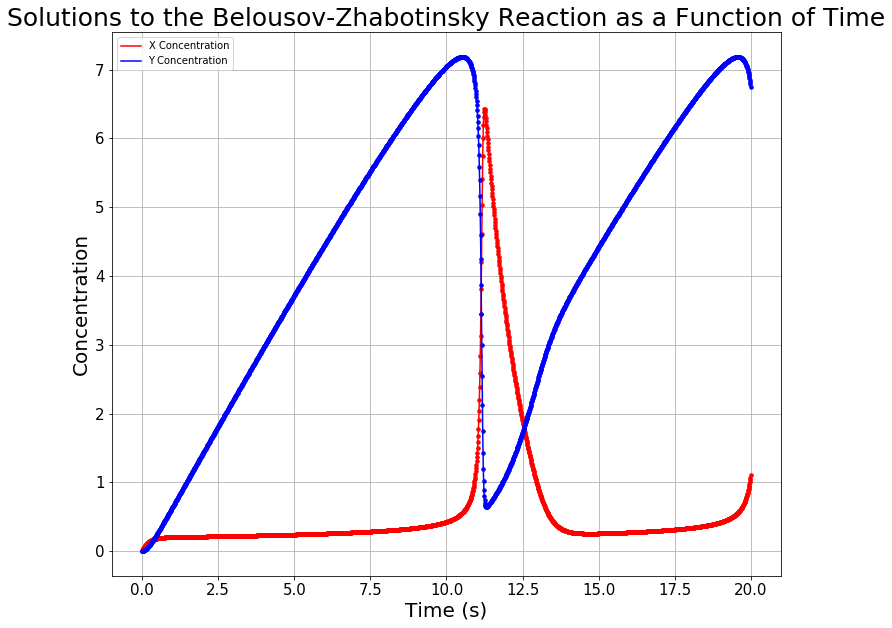

In [4]:
#PROBLEM 3 (with the non-adaptive Bulirsch-Stoer method)

#PART A
#Defining accuracy, a and b
delta = 1e-10
a = 1
b = 4

#Defining functions for the Belousov-Zhabotinsky reaction
def Belousov_Zhabotinsky(r):
    x = r[0]
    y = r[1]
    fx = 1 - (b + 1)*x + a*x**2*y
    fy = b*x - a*x**2*y
    return np.array([fx, fy], float)

#Defining a function for the Bulirsch-Stoer method using code modified from Newman (2013)
def Bulirsch_Stoer(t_init, t_final, H, f, x0, y0):
    tpoints = np.arange(t_init,t_final,H)
    xpoints = []
    ypoints=[]
    r = np.array([x0,y0],float)

    #Do "big steps" of size H
    for t in tpoints:

        xpoints.append(r[0])
        ypoints.append(r[1])

        #Do one modified midpoint step to start
        n = 1
        r1 = r + 0.5*H*f(r)
        r2 = r + H*f(r1)

        #Richardson extrapolation
        R1 = np.empty([1,2],float)
        R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))

        #Increase n until required accuracy reached
        error = 2*H*delta
        while error>H*delta:

            n += 1
            h = H/n

            # odified midpoint method
            r1 = r + 0.5*h*f(r)
            r2 = r + h*f(r1)
            for i in range(n-1):
                r1 += h*f(r2)
                r2 += h*f(r1)

            #Richardson extrapolation
            R2 = R1
            R1 = np.empty([n,2],float)
            R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
            for m in range(1,n):
                epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
                R1[m] = R1[m-1] + epsilon
            error = abs(epsilon[0])

        r = R1[n-1]
    return np.array(tpoints, float), np.array(xpoints, float), np.array(ypoints, float)

#PART B
#Defining initial conditions
ti = 0
tf = 20
H1 = 0.01
xi = 0.0
yi = 0.0

#Calculate x and y concentrations from the Belousov-Zhabotinsky reactions using the Bulirsch-Stoer method
time_nonadapt, x_nonadapt, y_nonadapt = Bulirsch_Stoer(ti, tf, H1, Belousov_Zhabotinsky, xi, yi)

#PART C
#Plotting x and y on the same axes
plt.figure(figsize=(12,10))
plt.plot(time_nonadapt, x_nonadapt, color = 'r', label='X Concentration')
plt.plot(time_nonadapt, x_nonadapt, '.', color='r', markersize=7)
plt.plot(time_nonadapt, y_nonadapt, color='b', label='Y Concentration')
plt.plot(time_nonadapt, y_nonadapt, '.', color='b', markersize=7)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Concentration', fontsize=20)
plt.title('Solutions to the Belousov-Zhabotinsky Reaction as a Function of Time', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('lab7_q3_plot1.pdf', bbox_inches='tight')
plt.show()

In [ ]:
#PROBLEM 3 (attempt at the adaptive method)

#PART A
#Defining accuracy, a and b
delta = 1e-10
a = 1
b = 4

#Defining functions for the Belousov-Zhabotinsky reaction
def Belousov_Zhabotinsky(r):
    x = r[0]
    y = r[1]
    fx = 1 - (b + 1)*x + a*x**2*y
    fy = b*x - a*x**2*y
    return np.array([fx, fy], float)

#Defining a function for the adaptive Bulirsch-Stoer method 
def adapt_Bulirsch_Stoer(t_init, t_final, H, x0, y0, f):
    tpoints = [] 
    r = np.array([x0, y0], float)
    xpoints = [r[0]]
    ypoints = [r[1]]
    
    #Define a function for the first modified midpoint step
    def modified_midpoint(r, H, f):
        n = 1
        r1 = r + 0.5*H*f(r)
        r2 = r + H*f(r1)
        return r1, r2, n
    
    #Define a function for the integration method
    def integrator(r, t_init, t_final, H, f): 
        t = t_init                                   #Initialize time
        
        while t < t_final:
            error = 2*H*delta
            r1, r2, n = modified_midpoint(r, H, f)   #Call the first modified midpoint step
            R1 = np.empty([1,2], float)
            R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))      #Richardson extrapolation

            while error > H*delta:
                n += 1
                if n <= 8:                           #Run through the method no more than 8 times
                    h = H/n
                    
                    #Modified midpoint method
                    r1 = r + 0.5*h*f(r)
                    r2 = r + h*f(r1)
                    for i in range(n - 1):
                        r1 += h*f(r2)
                        r2 += h*f(r1)
                
                    #Richardson extrapolation
                    R2 = R1
                    R1 = np.empty([n, 2], float)
                    R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
                    for m in range(1, n):
                        epsilon = (R1[m - 1] - R2[m - 1])/((n/(n - 1))**(2*m) - 1)
                        R1[m] = R1[m - 1] + epsilon
                        
                    error = abs(epsilon[0])           #Update the error
                    r = R1[n - 1]                     #Save calculated value of r to update in the next iteration
                
                #If method requires more than 8 tries, go back and repeat the method by dividing H in half
                #and running through with 2 steps 
                #(i.e. the function calls itself with H/2 instead of H)
                if n > 8 or np.isnan(error):          
                    r1 = integrator(r, t_init, t_init+H/2, H/2, f)  
                    r2 =  integrator(r1, t_init+H/2, t_final, H/2, f) 
                    r = r2
                    
            t = t + H                                 #Update time
            
            #Save all calculated values
            tpoints.append(t)
            xpoints.append(r[0])
            ypoints.append(r[1])
        return r
    
    r = integrator(r, t_init, t_final, H, f)          #Call the integration method 
    return np.array(tpoints, float), np.array(xpoints, float), np.array(ypoints, float)

#PART B
#Defining initial conditions
t_init = 0
t_final = 20
H = 20
x0 = 0.0
y0 = 0.0

#Calculate x and y concentrations from the Belousov-Zhabotinsky reactions using the adaptive Bulirsch-Stoer method
time, x_concentration, y_concentration = adapt_Bulirsch_Stoer(t_init, t_final, 20, x0, y0, Belousov_Zhabotinsky)

#PART C
#Plot the concentrations on the same axes (note that this version won't work)
plt.figure(figsize=(12,10))
plt.plot(time, x_concentration, color = 'r', label='X Concentration')
plt.plot(time, x_concentration, '.', color='r', markersize=7)
plt.plot(time, y_concentration, color='b', label='Y Concentration')
plt.plot(time, y_concentration, '.', color='b', markersize=7)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Concentration', fontsize=20)
plt.title('Solutions to the Belousov-Zhabotinsky Reaction as a Function of Time', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('lab7_q3_plot1.pdf', bbox_inches='tight')
plt.show()